# Fit hyper-parameters

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
from positive import *
from nrutils import scsearch, gwylm
from glob import glob
import pwca
from pwca import determine_data_fitting_region,pwca_catalog,metadata_dict

(positive)>> Applying custom matplotlib settings.
(init)>> Warm greetings from Welsh Puck (aka pwca).
(pwca.core)>> Catalog of calibration runs stored to "pwca.pwca_catalog"
(pwca.core)>> Metadata dictionary for calibration runs stored to "pwca.metadata_dict"


## This is notebook is only for scratch code and prototyping

In [135]:
# Load and unpuack physical parameter space
raw_domain = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_intial_binary_parameters.txt')
theta,m1,m2,eta,delta,chi_eff,chi_p,chi1,chi2 = raw_domain.T


# Define desired model domain variables and array 
u = cos(theta)
model_domain = array( [ u, eta, chi_eff, chi_p ] ).T

# Load and unpuack physical parameter space -- dphi
dphi_range = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_opt_dphase_parameters.txt')
nu4,nu5,nu6 = dphi_range.T

# Load and unpuack physical parameter space -- amp
amp_range = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_opt_amplitude_parameters.txt')
mu1, mu2, mu3, mu4 = amp_range.T

# labels={'python':['nu4',('u', 'eta', 'chi_eff', 'chi_p'),''],'latex':['nu4',(r'u', r'\eta', r'\chi_s', r'\chi_p'),'']}

In [79]:
# nu4
foo = gmvpfit( model_domain, nu4,fitatol=0.002,verbose=True,maxdeg_list=[3,2,1,1],center=True)
foo.plot();
# nu5
foo = gmvpfit( model_domain, nu5,fitatol=0.002,verbose=True,maxdeg_list=[3,3,1,1],center=True)
foo.plot();
# nu6
foo = gmvpfit( model_domain, nu6,fitatol=0.002,verbose=True,maxdeg_list=[3,3,1,1],center=False)
foo.plot();

In [ ]:
# mu1 
# ---

# possibly overfit
foo = gmvpfit( model_domain, mu1,fitatol=0.004,verbose=True,maxdeg_list=[2,3,1,2],center=False,temper=False)
foo.plot();

# mu2
# ---

# not overfit
foo = gmvpfit( model_domain, mu2,fitatol=0.004,verbose=True,maxdeg_list=[2,2,2,2],center=True)
foo.plot();

# mu3
# ---

# not overfit
foo = gmvpfit( model_domain, mu3,fitatol=0.004,verbose=True,maxdeg_list=[2,2,2,2],center=True)
foo.plot();

# mu4
# ---

# not overfit
foo = gmvpfit( model_domain, mu4,fitatol=0.004,verbose=True,maxdeg_list=[2,2,2,2],center=False)
foo.plot();



In [278]:

datadir = '/Users/book/KOALA/puck/ll/data/version2/'
foo_path = datadir+'parameter_space_fits.pickle'
foo = pickle.load( open( foo_path, "rb" ) )


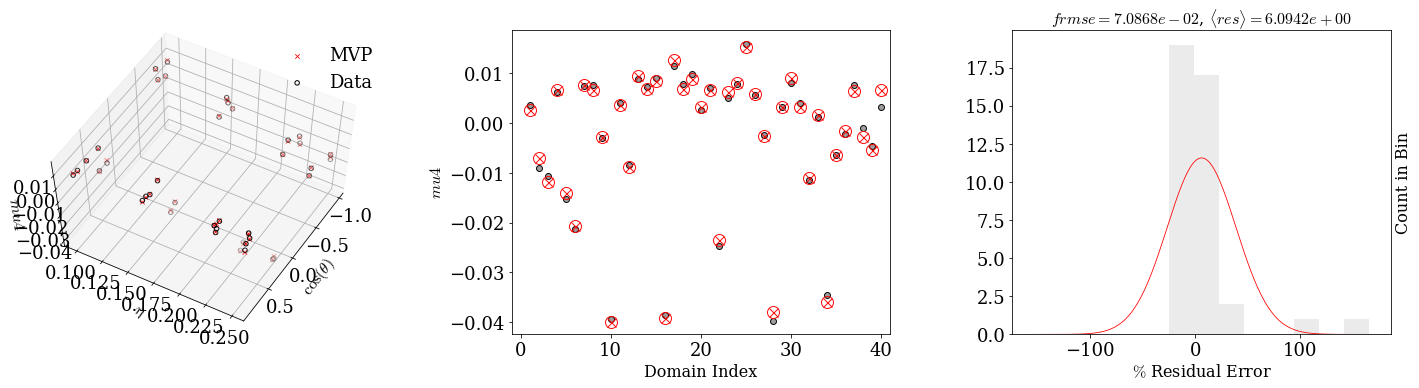

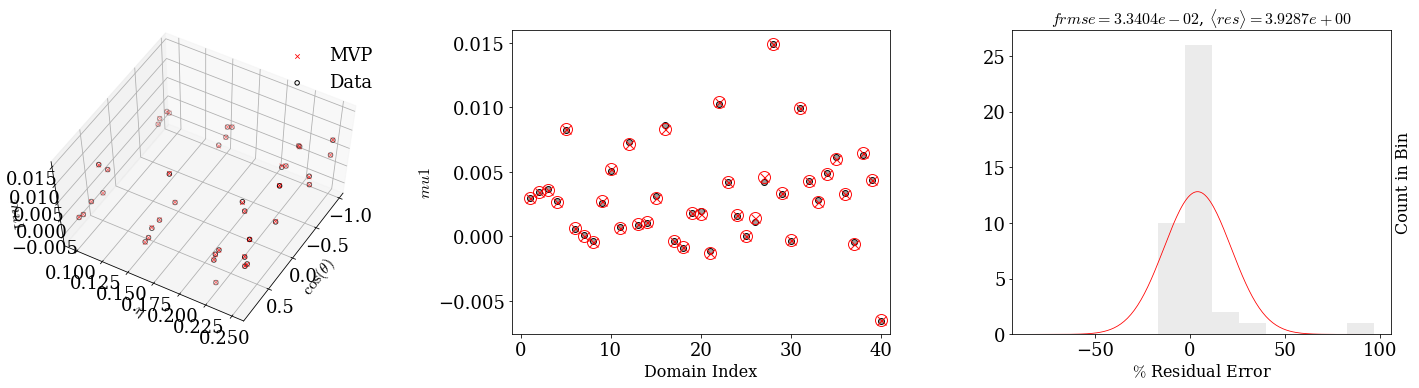

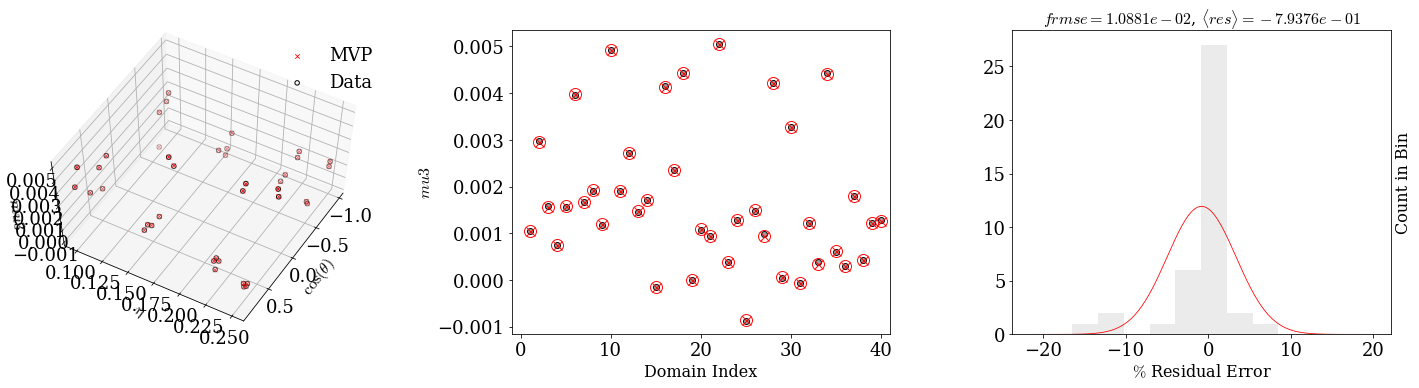

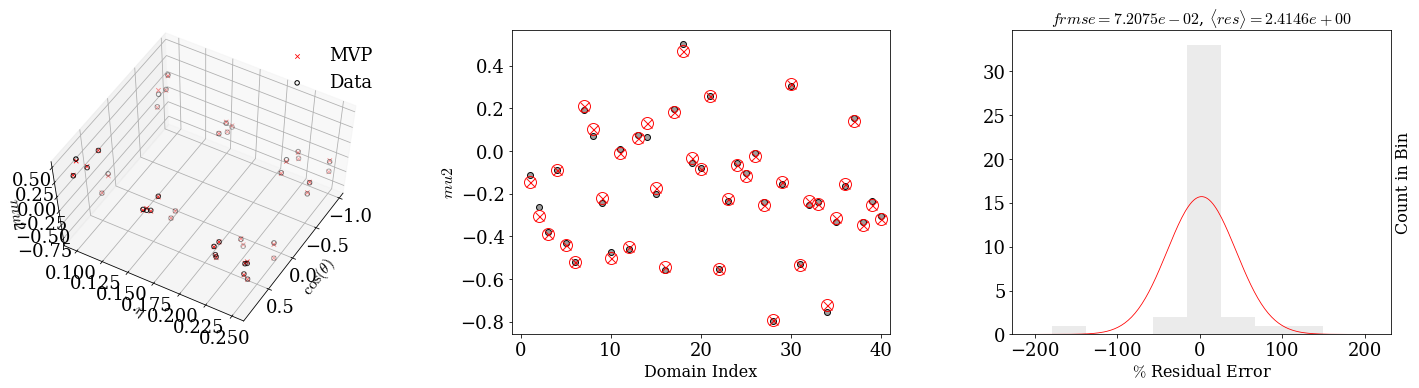

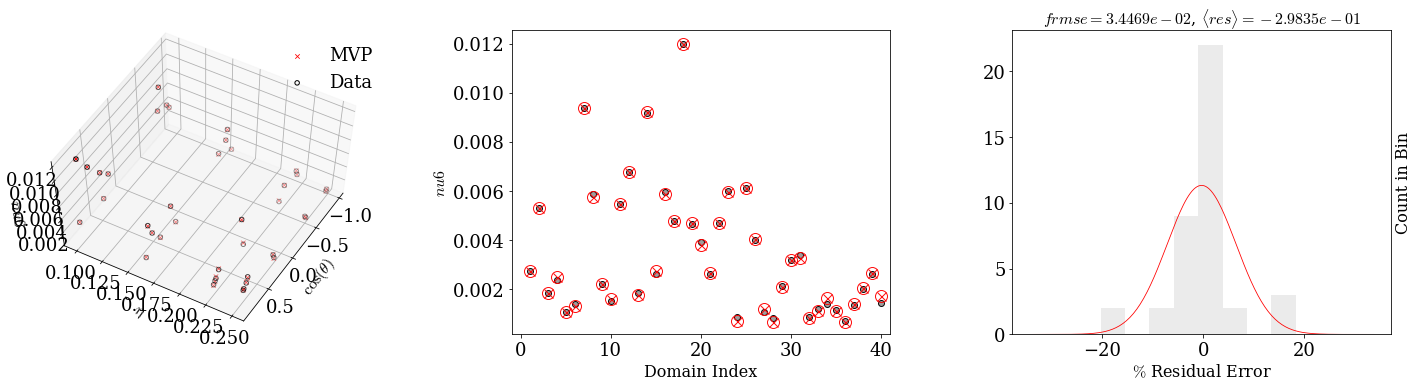

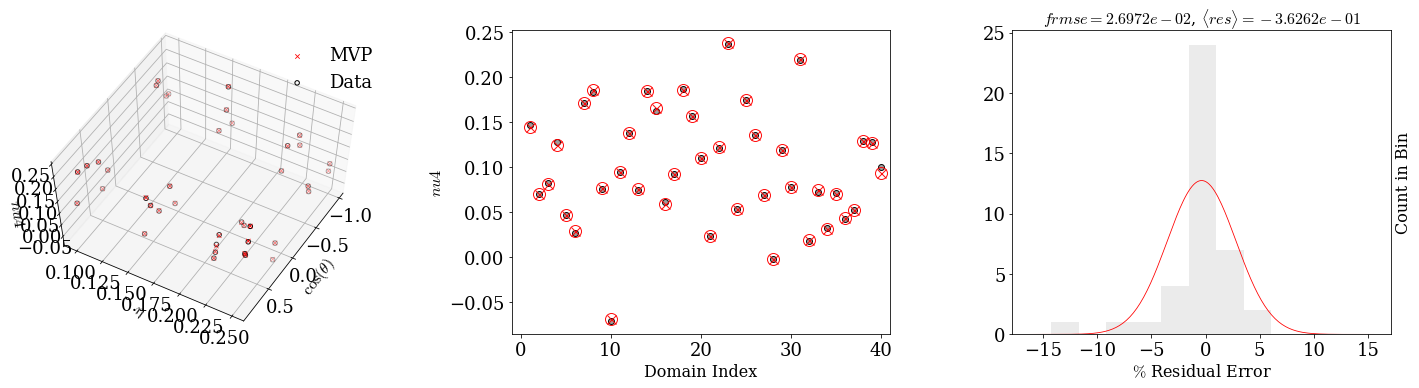

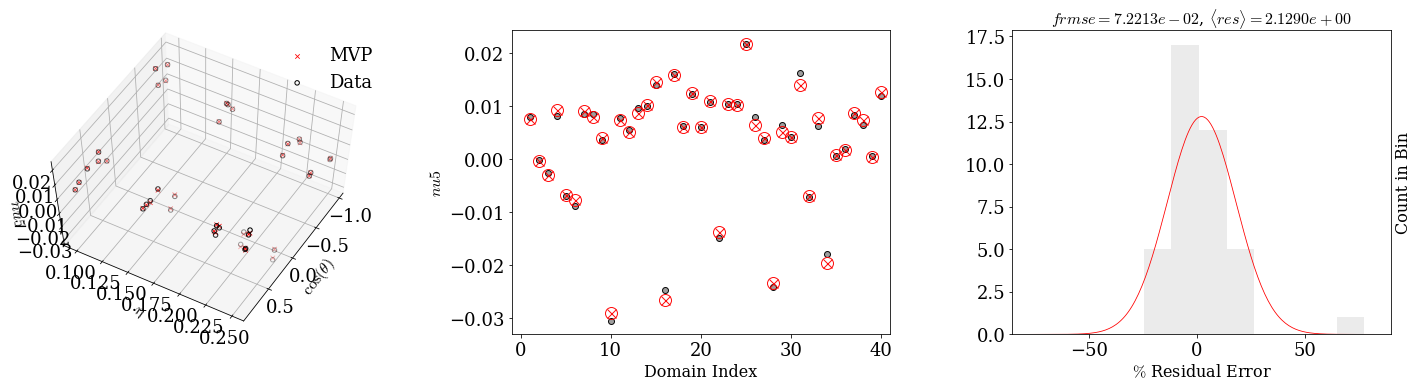

In [295]:

# Plot fits 

for k in foo:
    if ('mu' in k)or('nu' in k):
        # Generate plot
        labels={'python':[k,('u', 'eta', 'chi_eff', 'chi_p'),''],'latex':[k,(r'\cos(\theta)', r'\eta', r'\chi_s', r'\chi_p'),'']}
        fig = foo[k].plot(labels=labels,size_scale=1.2)
        # Save figure 
        figure_path = datadir + k+'_fit_diagnostic.pdf'
        savefig( figure_path, pad_inches=0 )
        
        

In [332]:

# Plot fits and get code strings

code_string = ['\n\n#\ndef generate_model_params(theta,eta,chi_eff,chi_p):\n\n',
               '\t\'\'\'\n\tHola, soy un codigo escribido por codigo. ~londonl@mit.edu/pilondon2@gmail.com 2020\n\t\'\'\'  \n\n',
               '\t# Import usefuls\n',
               '\tfrom numpy import cos\n\n',
               '\t# Preliminaries\n',
               '\tu = cos(theta)\n','\tu2 = u*u\n', '\tu3 = u2*u\n', 
               '\tu3 = u2*u\n', '\teta2 = eta*eta\n', '\teta3 = eta2*eta\n', 
               '\tchi_eff2 = chi_eff*chi_eff\n', '\tchi_eff3 = chi_eff2*chi_eff\n', 
               '\tchi_p2 = chi_p*chi_p\n', 
               '\tchi_p3 = chi_p2*chi_p\n\n' 
              ]

# determine list of fitted variables and sort
fit_var = sort( [ k for k in foo.keys() if ('mu' in k)or('nu' in k) ] )

#
for k in fit_var:
    
    # Store python code for fit
    code_string.append( '\t# %s\n'%k )

    #
    this_code_string = foo[k].__str_python__()
    this_code_string = this_code_string.replace('chi_p*chi_p','chi_p2')
    this_code_string = this_code_string.replace('chi_p2*chi_p','chi_p3')
    this_code_string = this_code_string.replace('u*u','u2')
    this_code_string = this_code_string.replace('u2*u','u3')
    this_code_string = this_code_string.replace('chi_eff*chi_eff','chi_eff2')
    this_code_string = this_code_string.replace('chi_eff2*chi_eff','chi_eff3')
    this_code_string = this_code_string.replace('eta*eta','eta2')
    this_code_string = this_code_string.replace('eta2*eta','eta3')

    #
    code_string.append( '\t'+this_code_string+'\n\n' )
        
#
code_string.append( '\t#\n' )
code_string.append( '\treturn %s\n'%(','.join(fit_var)) )

In [333]:

# Write fit equations to file 

code_path = datadir+'parameter_space_fits.py'
f = open(code_path,'w+')

f.writelines(code_string)


In [334]:
f.close()